**CNN swimming pool classification**

*Quera Tech Olympic 2024 problem*

# Necessory libraries

In [ ]:
import pandas as pd
import numpy as np

# Loading DataSet

In [ ]:
# # Run this cell to download directly to colab\

# # Install gdown
!pip install gdown

# # Import necessary libraries
import gdown
import zipfile

# # Google Drive file ID and destination filename
file_id = '1b8O_a6ywcsbLqJAGDGCkePrdn1cFlXl0'
destination = '/content/data_pool.zip'

# # Download the file from Google Drive
gdown.download(f'https://drive.google.com/uc?id={file_id}', destination, quiet=False)

# # Unpack the zip file
with zipfile.ZipFile(destination, 'r') as zip_ref:
     zip_ref.extractall('unzipped_content')

print("Download and extraction complete.")


Download and extraction complete.


In [ ]:
train_data = pd.read_json('/content/unzipped_content/train.json')
print(train_data)

                                                  rooms
0     {'id': 3175858, 'title': 'رزرو ویلا با استخر ر...
1     {'id': 3237321, 'title': 'اجاره ویلا استخردار ...
2     {'id': 3154228, 'title': 'اجاره ویلا با استخر ...
3     {'id': 3169850, 'title': 'رزرو سوئیت در جواهرد...
4     {'id': 3207557, 'title': 'اجاره سوئیت در جاده ...
...                                                 ...
1594  {'id': 3167459, 'title': 'اجاره ویلا استخردار ...
1595  {'id': 3207406, 'title': 'اجاره ویلا استخردار ...
1596  {'id': 3172620, 'title': 'اجاره ویلا چابکسر - ...
1597  {'id': 3237948, 'title': 'اجاره سوئیت در جواهر...
1598  {'id': 3229812, 'title': 'اجاره خانه با ویو کو...

[1599 rows x 1 columns]


In [ ]:
train_data['rooms'][0]

{'id': 3175858,
 'title': 'رزرو ویلا با استخر روباز آبگرم در چهارباغ',
 'description': '**رزرو ویلا با استخر روباز آبگرم در چهارباغ **\nاین ویلا دو خوابه که یک اتاق خواب مستر دارد با استخر چهارفصل روباز آبگرم در حیاط دنج و باصفای ویلا مزین به آبنما، فضای سبز، آتشدان و باربیکیو در منطقه ای امن و آرام از چهارباغ واقع شده است و با شهر کرج حدود ۲۵ کیلومتر فاصله دارد.\nبام تهرانی موجود به همراه فضای حیاط دلنشین ویلا می تواند اوقات خوشی را جهت شب نشینی و بهره بردن از آب و هوای منطقه فراهم آورد.\nمحیط اطراف ویلا از چهار طرف با دیوار بلند حصارکشی شده است و یک واحد نگهبانی شبانه در کانکس موجود در محوطه کوچه مستقر می باشد.\nاز این ویلا با حدود ۳ دقیقه رانندگی دسترسی به نانوایی و سوپرمارکت امکان\u200cپذیر است.\nکیفیت خطوط شبکه برای ایرانسل و همراه اول در مکالمه عالی و پوشش اینترنت ۴g می باشد.\nلازم به ذکر است حدود ۴۰۰ متر مسیر انتهایی ویلا جاده خاکی مناسب برای عبور و مرور وسایل نقلیه می باشد.',
 'province': {'id': 'p31', 'name': 'البرز'},
 'city': {'id': 363, 'name': 'چهارباغ'}}

In [ ]:
test_data = pd.read_json('/content/unzipped_content/test.json')
print(test_data)

               rooms
0    {'id': 3160664}
1    {'id': 3195184}
2    {'id': 3224078}
3    {'id': 3233712}
4    {'id': 3201449}
..               ...
856  {'id': 3232618}
857  {'id': 3230930}
858  {'id': 3171083}
859  {'id': 3168538}
860  {'id': 3168123}

[861 rows x 1 columns]


# Data preprocessing

In [ ]:
import cv2
import os

In [ ]:
train_img = []
train_label = []
train_path = '/content/unzipped_content/train/'
imgsize = 224

for room in train_data['rooms']:

    path = os.path.join(train_path, str(room['id']))
    img_path = os.path.join(path, sorted(os.listdir(path))[0])
    img = cv2.imread(img_path, cv2.IMREAD_COLOR)
    img = cv2.resize(img, (imgsize, imgsize))
    img = img.reshape((-1, 224, 224, 3))

    train_img.append(np.array(img))

    if 'استخر' in room['title'] or 'استخر' in room['description']:
        train_label.append(1)
    else:
        train_label.append(0)

        img_path = os.path.join(path, sorted(os.listdir(path))[1])
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (imgsize, imgsize))
        img = img.reshape((-1, 224, 224, 3))

        train_img.append(np.array(img))
        train_label.append(0)

In [ ]:
train_images = np.array(train_img)
train_labels = np.array(train_label)

train_images = train_images.reshape((-1, 224, 224, 3))
train_images = train_images.astype("float32") / 255.

In [ ]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels, num_classes=2)

# Model designing

In [ ]:
import tensorflow as tf

> Using pretrained advance architectures ResNet50 (optional)

In [ ]:
# resnet50 = tf.keras.applications.ResNet50(include_top=False,
#                                          input_shape=(224, 224, 3),
#                                          weights='imagenet')
# for layer in resnet50.layers:
#    layer.trainable = False

In [ ]:
from keras.models import Sequential
from keras import layers

In [ ]:
model = Sequential()

model.add(layers.Input(shape=(224, 224, 3)))

model.add(layers.Conv2D(528, kernel_size=(5, 5), padding='same',
                        activation='relu', strides=(1, 1)))
model.add(layers.MaxPool2D(pool_size=(2, 2), padding='same'))
model.add(layers.BatchNormalization())

model.add(layers.Conv2D(256, kernel_size=(5, 5), padding='same',
                        activation='relu', strides=(1, 1)))
model.add(layers.MaxPool2D(pool_size=(2, 2), padding='same'))
model.add(layers.Dropout(.2))

model.add(layers.Conv2D(128, kernel_size=(5, 5), padding='same',
                        activation='relu', strides=(1, 1)))
model.add(layers.MaxPool2D(pool_size=(2, 2), padding='same'))
model.add(layers.Dropout(.5))

model.add(layers.Conv2D(64, kernel_size=(3, 3), padding='same',
                        activation='relu', strides=(1, 1)))
model.add(layers.MaxPool2D(pool_size=(2, 2)))

model.add(layers.Conv2D(32, kernel_size=(3, 3), padding='same',
                        activation='relu', strides=(1, 1)))
model.add(layers.MaxPool2D(pool_size=(2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(2, activation='softmax'))


In [ ]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)                   │ (None, 224, 224, 528)       │          40,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 112, 112, 528)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 112, 112, 528)       │           2,112 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 112, 112, 256)       │       3,379,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 56, 56, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 56, 56, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 56, 56, 128)         │         819,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 28, 28, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 14, 14, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 1568)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 2)                   │           3,138 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,336,418 (16.54 MB)

 Trainable params: 4,335,362 (16.54 MB)

 Non-trainable params: 1,056 (4.12 KB)

# Trainning

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy', 'f1_score'])

In [ ]:
hist = model.fit(train_images, train_labels,
                 epochs=50,
                 batch_size=32,
                 validation_split=0.1)

Epoch 1/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 116s 2s/step - accuracy: 0.7547 - f1_score: 0.6952 - loss: 0.5181 - val_accuracy: 0.7375 - val_f1_score: 0.6519 - val_loss: 0.6051
Epoch 2/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 116s 2s/step - accuracy: 0.7617 - f1_score: 0.7018 - loss: 0.5121 - val_accuracy: 0.7292 - val_f1_score: 0.6191 - val_loss: 0.5687
Epoch 3/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.7642 - f1_score: 0.6959 - loss: 0.5026 - val_accuracy: 0.7042 - val_f1_score: 0.6308 - val_loss: 0.5791
Epoch 4/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 141s 2s/step - accuracy: 0.7604 - f1_score: 0.7094 - loss: 0.4922 - val_accuracy: 0.7500 - val_f1_score: 0.6153 - val_loss: 0.5453
Epoch 5/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 143s 2s/step - accuracy: 0.7654 - f1_score: 0.7294 - loss: 0.4840 - val_accuracy: 0.7250 - val_f1_score: 0.6333 - val_loss: 0.6104
Epoch 6/50
58/68 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.7892 - f1_score: 0.7255 - loss: 0.4497

# Evaluating

In [ ]:
test_loss, test_acc, f1_test = model.evaluate(train_images, train_labels)

75/75 ━━━━━━━━━━━━━━━━━━━━ 38s 515ms/step - accuracy: 0.7588 - f1_score: 0.7179 - loss: 0.5041


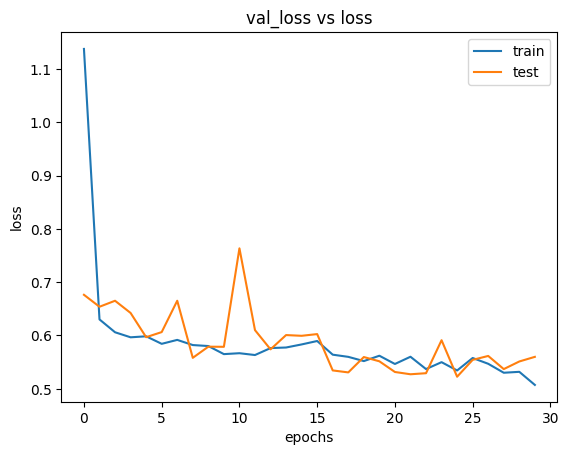

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('val_loss vs loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'test'])
plt.show()

# Save Model

In [ ]:
model.save('pool.h5')